In [0]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [0]:
def load_data(data_path):
    """
    This function is used to load the dataset from given directory
    """
    data = pd.read_csv(data_path)
    return data

In [0]:
#Loading the dataset 
df = load_data('Churn_Modelling.csv')

In [26]:
#Checking the shape of the dataset
df.shape

(10000, 14)

In [27]:
#Checking for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [28]:
#Get Unique count for each variable
df.nunique()


RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [0]:
# As RowNumber, customerid and surname will be not helpful in making predictions so need to drop them
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [30]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
#Checking the datatypes of each column
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

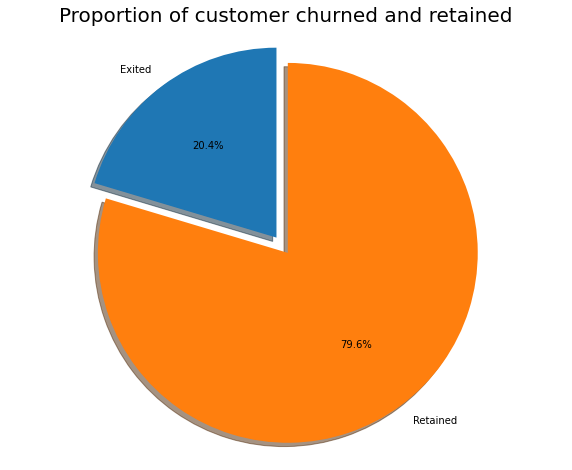

In [32]:
#Expolatory data analysis
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

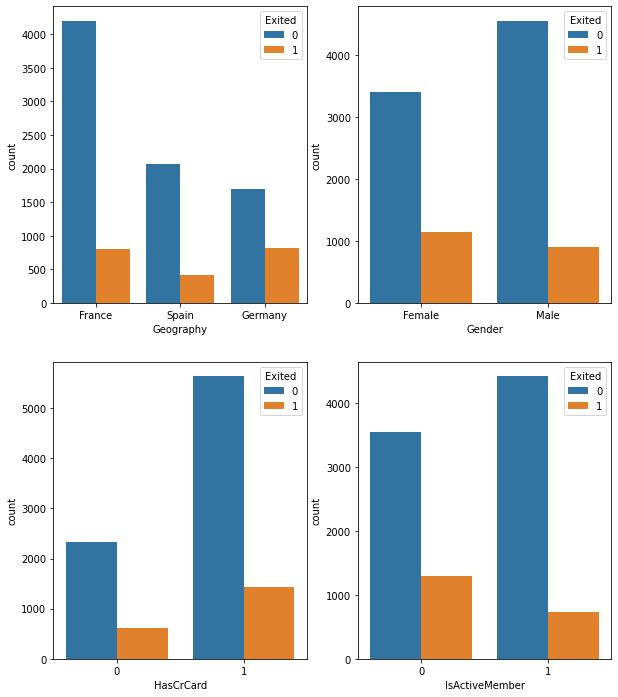

In [56]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(10, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

### Question 1: Which gender has highest churning rate and are they active member or inactive  member?





Answer:- From the above plot it it clear that The proportion of female customers churning is also greater than that of male customers.
Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.

### Question 2:  Which customer has higher churning rate one who uses our services like credit card or one who not uses services frequently?

Asnwer: Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.

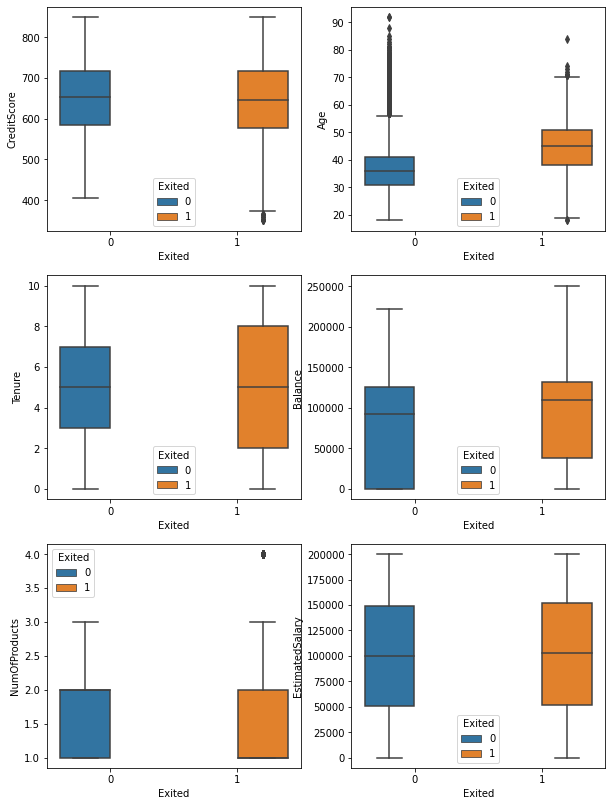

In [55]:
fig, axarr = plt.subplots(3, 2, figsize=(10, 14))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

## Question 3: Is there any relation between age and tenure time?

Answer: The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups
With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.

In [0]:
#Deviding the dataset into independent variable and target variable
X = df.iloc[:, 0:10].values
y = df.iloc[:, -1].values

In [0]:
#Dealing with categorical columns
#Using label encode on Geography column
labelencoder_X_1 = LabelEncoder()
X[:,1] = labelencoder_X_1.fit_transform(X[:,1])
#Using label encoder on Gender column
labelencoder_X_2 = LabelEncoder()
X[:,2] = labelencoder_X_2.fit_transform(X[:,2])
#Using onehotencoder on Geography column 
ohe = ColumnTransformer([("Geography", OneHotEncoder(), [1])], remainder = 'passthrough')
X = ohe.fit_transform(X)
X = X[:, 1:]

In [0]:
def split_data(df1, df2):
    """
    This function takes independent variables and dependent variables as input and returns X_train, X_test, y_train, y_test
    """
    X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size = 0.2, random_state = 42)
    return X_train, X_test, y_train, y_test

In [0]:
X_train, X_test, y_train, y_test = split_data(X, y)

In [0]:
#Doing feature scaling, As we know deep learning is highly computational expensive so we need feature scaling.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#Building classifier
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(6, input_dim = 11, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    classifier.compile(loss = 'binary_crossentropy', optimizer = sgd, metrics = ['accuracy'])
    return classifier

In [0]:
model = build_classifier()

In [42]:
model.fit(X_train,y_train,batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3868 - accuracy: 0.8195
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.8385
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3708 - accuracy: 0.8429
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.8419
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3670 - accuracy: 0.8409
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3658 - accuracy: 0.8414
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3645 - accuracy: 0.8415
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.8413
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3623 - accuracy: 0.8429
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3618 - accura

In [0]:
y_pred = model.predict(X_test)

In [0]:
#Prdictiong on X_test
y_pred = y_pred > 0.5

In [0]:
#Confusion_Matrix
cm = confusion_matrix(y_pred, y_test)

In [51]:
#Printing confusion_matrix
print(cm)

[[1507  195]
 [ 100  198]]


In [0]:
#Importing classification report
from sklearn.metrics import classification_report

In [49]:
#Printing classification report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       False       0.94      0.89      0.91      1702
        True       0.50      0.66      0.57       298

    accuracy                           0.85      2000
   macro avg       0.72      0.77      0.74      2000
weighted avg       0.87      0.85      0.86      2000

